##Fase 1: Comprensión del Negocio
En esta fase, se define el objetivo del proyecto y se obtiene un entendimiento del problema que se va a resolver.

Objetivo del proyecto: Desarrollar un asistente de compras que pueda clasificar imágenes de frutas y verduras y encontrar el supermercado más barato para el producto clasificado.

##Fase 2: Comprensión de los Datos
En esta fase, se recopilan y exploran los datos necesarios para el proyecto.

In [1]:
# 1. Instalamos las dependencias necesarias.
!pip install tensorflow keras numpy matplotlib pandas

In [2]:
# 2. Importamos las bibliotecas necesarias.
import os
import json
import shutil
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [3]:
# 3. Montamos el driver con los archivos necesarios.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# 4. Descomprimimos el archivo con el dataset.
!unzip /content/drive/MyDrive/ISPC-3°AÑO/AsistenteDeCompras/dataset.zip

Archive:  /content/drive/MyDrive/ISPC-3°AÑO/AsistenteDeCompras/dataset.zip
   creating: dataset/
   creating: dataset/Carrefour/
   creating: dataset/Carrefour/Acelga/
  inflating: dataset/Carrefour/Acelga/Acelga.jpg  
   creating: dataset/Carrefour/Ajo/
  inflating: dataset/Carrefour/Ajo/Ajo.jpg  
   creating: dataset/Carrefour/Ají/
  inflating: dataset/Carrefour/Ají/Ají.jpg  
   creating: dataset/Carrefour/Albahaca/
  inflating: dataset/Carrefour/Albahaca/Albahaca.jpg  
   creating: dataset/Carrefour/Almendras/
  inflating: dataset/Carrefour/Almendras/Almendras.jpg  
   creating: dataset/Carrefour/Batata/
  inflating: dataset/Carrefour/Batata/Batata.jpg  
   creating: dataset/Carrefour/Berenjena/
  inflating: dataset/Carrefour/Berenjena/Berenjena.jpg  
   creating: dataset/Carrefour/Castañas/
  inflating: dataset/Carrefour/Castañas/Castañas.jpg  
   creating: dataset/Carrefour/Cebolla/
  inflating: dataset/Carrefour/Cebolla/Cebolla.jpg  
   creating: dataset/Carrefour/Champignones/


##Fase 3: Preparación de los Datos
En esta fase, se preparan los datos para su análisis y modelado.

In [5]:
# 5. Cargar y preprocesar las imágenes.
# Directorio base donde se encuentran las imágenes originales
data_dir = '/content/drive/MyDrive/ISPC-3°AÑO/AsistenteDeCompras/dataset'
# Directorio base para las imágenes aumentadas
augmented_data_dir = '/content/drive/MyDrive/ISPC-3°AÑO/AsistenteDeCompras/dataset/augmented_data'

# Configuración de la aumentación de datos
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Recorrer cada supermercado y cada fruta/verdura para generar imágenes aumentadas
for supermarket in os.listdir(data_dir):
    supermarket_path = os.path.join(data_dir, supermarket)
    if os.path.isdir(supermarket_path):
        for fruit in os.listdir(supermarket_path):
            fruit_path = os.path.join(supermarket_path, fruit)
            if os.path.isdir(fruit_path):
                # Crear directorio para las imágenes aumentadas si no existe
                save_to_dir = os.path.join(augmented_data_dir, supermarket, fruit)
                os.makedirs(save_to_dir, exist_ok=True) # Asegúrate de que el directorio existe
                for img_name in os.listdir(fruit_path):
                    img_path = os.path.join(fruit_path, img_name)
                    try:
                        img = tf.keras.preprocessing.image.load_img(img_path)
                        x = tf.keras.preprocessing.image.img_to_array(img)
                        x = x.reshape((1,) + x.shape)
                        # Generar imágenes aumentadas
                        i = 0
                        for batch in datagen.flow(x, batch_size=1, save_to_dir=save_to_dir, save_prefix=fruit, save_format='jpeg'):
                            i += 1
                            if i > 30: # Generar 30 imágenes nuevas por imagen original
                                break
                    except Exception as e:
                        print(f"Error procesando la imagen {img_path}: {e}")


In [6]:
# Directorio base actual donde se encuentran las imágenes aumentadas
current_augmented_data_dir = '/content/drive/MyDrive/ISPC-3°AÑO/AsistenteDeCompras/dataset/augmented_data'

# Nuevo directorio base donde se reorganizarán las imágenes aumentadas
new_augmented_data_dir = '/content/drive/MyDrive/ISPC-3°AÑO/AsistenteDeCompras/reorganized_dataset'
os.makedirs(new_augmented_data_dir, exist_ok=True)  # Crear el directorio si no existe

# Recorrer cada supermercado y cada fruta/verdura en el directorio actual
for supermarket in os.listdir(current_augmented_data_dir):
    supermarket_path = os.path.join(current_augmented_data_dir, supermarket)
    if os.path.isdir(supermarket_path):
        for fruit in os.listdir(supermarket_path):
            fruit_path = os.path.join(supermarket_path, fruit)
            if os.path.isdir(fruit_path):
                for img_name in os.listdir(fruit_path):
                    img_path = os.path.join(fruit_path, img_name)
                    try:
                        # Crear la nueva ruta para la imagen
                        new_dir_path = os.path.join(new_augmented_data_dir, fruit, supermarket)
                        os.makedirs(new_dir_path, exist_ok=True)  # Crear el directorio si no existe

                        # Mover la imagen a la nueva ubicación
                        new_img_path = os.path.join(new_dir_path, img_name)
                        shutil.move(img_path, new_img_path)
                    except Exception as e:
                        print(f"Error moviendo la imagen {img_path}: {e}")

print("Reorganización completa.")


Reorganización completa.


##Fase 4: Modelado
En esta fase, se crean y entrenan los modelos de machine learning.



In [24]:
# 6. Entrenamos y guardamos el modelo.
# Directorios de datos
base_dir = '/content/drive/MyDrive/ISPC-3°AÑO/AsistenteDeCompras/reorganized_dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Parámetros
img_height, img_width = 150, 150
batch_size = 32
epochs = 25

# Generadores de datos con aumentación
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2 # Utilizamos el 20% de los datos para validación
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Definir el modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

# Entrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping, model_checkpoint]
)

# Guardar json con la clase de los datos
with open('class_indices.json', 'w') as f:
    json.dump(train_generator.class_indices, f)

# Guardar el modelo final
model.save('final_model.h5')


Found 2295 images belonging to 121 classes.
Found 552 images belonging to 121 classes.
Epoch 1/25
71/71 [==============================] - 658s 9s/step - loss: 4.3342 - accuracy: 0.0508 - val_loss: 3.7000 - val_accuracy: 0.1066
Epoch 2/25
71/71 [==============================] - 168s 2s/step - loss: 3.3275 - accuracy: 0.1525 - val_loss: 2.6772 - val_accuracy: 0.2298
Epoch 3/25
71/71 [==============================] - 161s 2s/step - loss: 2.5783 - accuracy: 0.2634 - val_loss: 1.9980 - val_accuracy: 0.3952
Epoch 4/25
71/71 [==============================] - 170s 2s/step - loss: 2.1283 - accuracy: 0.3531 - val_loss: 1.6052 - val_accuracy: 0.5460
Epoch 5/25
71/71 [==============================] - 170s 2s/step - loss: 1.7351 - accuracy: 0.4472 - val_loss: 1.3073 - val_accuracy: 0.6305
Epoch 6/25
71/71 [==============================] - 170s 2s/step - loss: 1.4155 - accuracy: 0.5506 - val_loss: 1.0395 - val_accuracy: 0.6636
Epoch 7/25
71/71 [==============================] - 169s 2s/step - 

##Fase 5: Evaluación
En esta fase, se evalúa el modelo entrenado para asegurarse de que cumple con los requisitos del negocio.

In [25]:
# Cargar el modelo guardado
model = tf.keras.models.load_model('best_model.h5')

# Evaluar el modelo
loss, accuracy = model.evaluate(validation_generator)
print(f'Model accuracy: {accuracy*100:.2f}%')


18/18 [==============================] - 17s 889ms/step - loss: 0.0549 - accuracy: 0.9909
Model accuracy: 99.09%


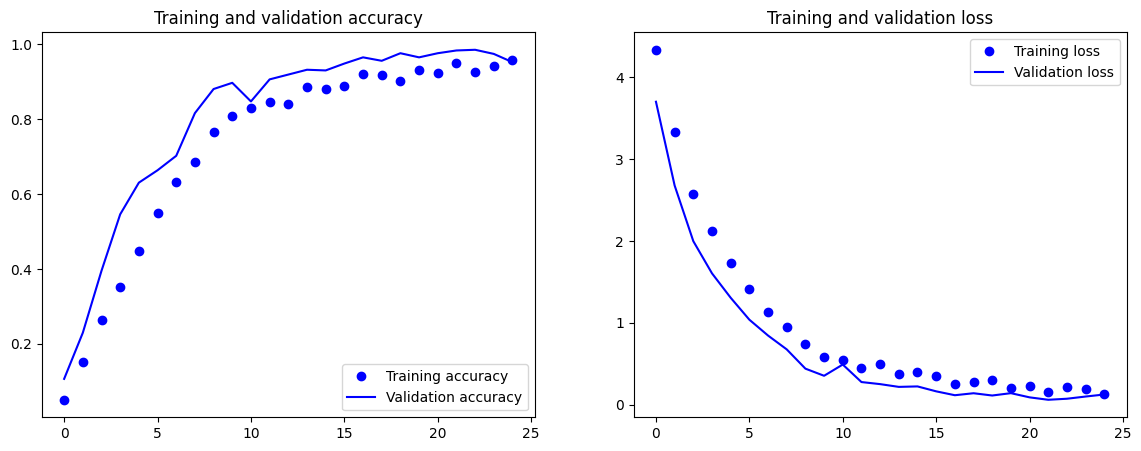

In [26]:
# Visualización con Matplotlib
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

# Llamar a la función para plotear la historia del entrenamiento
plot_training_history(history)

##Fase 6: Despliegue
En esta fase, se implementa el modelo en un entorno de producción y se prepara para su uso.


In [27]:
# 8. Preparamos el archivo CSV para su procesamiento.
# Ruta del archivo CSV
prices_path = '/content/drive/MyDrive/ISPC-3°AÑO/AsistenteDeCompras/dataset/VerdurasNormalizadas.csv'

# Cargar el archivo CSV
prices_df = pd.read_csv(prices_path)

# Limpiar y convertir los precios a valores numéricos
prices_df['Precio'] = prices_df['Precio'].str.replace(r'[^0-9]', '', regex=True)
prices_df['Precio'] = pd.to_numeric(prices_df['Precio'], errors='coerce') / 100

# Imprimir el DataFrame resultante
print(prices_df)

    Supermercado Producto   Precio
0      Carrefour      Ajo  7690.00
1      Carrefour   Tomate  5499.00
2      Carrefour   Sandía  2499.00
3      Carrefour   Rúcula   699.00
4      Carrefour   Acelga  1189.00
..           ...      ...      ...
456        Jumbo      Mix  5616.39
457        Jumbo      Mix    14.90
458        Jumbo   School     5.99
459        Jumbo      Mix      NaN
460        Jumbo      Mix      NaN

[461 rows x 3 columns]


In [29]:
# 9. Probamos el modelo y su funcionalidad.
# Función para encontrar el supermercado más barato para un producto dado
def supermercado_mas_barato(producto, prices_df):
    precios_producto = prices_df[prices_df['Producto'] == producto]
    supermercado_mas_barato = precios_producto.loc[precios_producto['Precio'].idxmin(), 'Supermercado']
    precio_mas_bajo = precios_producto['Precio'].min()
    return supermercado_mas_barato, precio_mas_bajo

# Cargar el modelo previamente entrenado
model = tf.keras.models.load_model('/content/drive/MyDrive/ISPC-3°AÑO/AsistenteDeCompras/best_model.h5')

# Función para clasificar una imagen y encontrar el supermercado más barato para esa categoría
def clasificar_y_encontrar_supermercado(imagen_path, prices_df):
    # Cargar la imagen y preprocesarla
    img = load_img(imagen_path, target_size=(150, 150))
    img_array = img_to_array(img)
    img_array = img_array.reshape((1,) + img_array.shape)
    img_array /= 255.0 # Normalizar los valores de píxeles

    # Clasificar la imagen utilizando el modelo
    prediction = model.predict(img_array)
    clase_predicha = np.argmax(prediction)

    # Mapear la clase predicha al nombre de la fruta o verdura
    if train_generator:
        clases = train_generator.class_indices
        frutas_verduras = {v: k for k, v in clases.items()}
        producto = frutas_verduras[clase_predicha]

        # Encontrar el supermercado más barato para el producto dado
        supermercado, precio = supermercado_mas_barato(producto, prices_df)
        return producto, supermercado, precio
    else:
        return None, None, None

# Ruta de la imagen que deseas clasificar y comparar precios
imagen_path = '/content/drive/MyDrive/ISPC-3°AÑO/AsistenteDeCompras/dataset/Carrefour/Coco/Coco.jpg'

# Clasificar la imagen y encontrar el supermercado más barato
producto, supermercado, precio = clasificar_y_encontrar_supermercado(imagen_path, prices_df)

# Imprimir el resultado
if producto:
    print(f"La imagen es de un(a) {producto}.")
    print(f"El supermercado más barato para {producto} es {supermercado} con un precio de ${precio:.2f}.")
else:
    print("No se pudo clasificar la imagen.")


1/1 [==============================] - 0s 163ms/step
La imagen es de un(a) Coco.
El supermercado más barato para Coco es Carrefour con un precio de $2999.00.


##Conclusión
Este proyecto utiliza una combinación de técnicas de aprendizaje profundo y procesamiento de imágenes para crear un asistente de compras capaz de clasificar imágenes de frutas y verduras y encontrar el supermercado más barato para estos productos. Las herramientas y bibliotecas de Python proporcionan un entorno robusto para desarrollar, entrenar, evaluar y desplegar el modelo, permitiendo una implementación efectiva de la solución propuesta.